# Why Workers Quit? 

Dataset: IBM RH Analytics Employee Attrition & Performance - Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

In this project, let's dig the data from kaggle and understand why workers leave their jobs. Also, we will make a gender analysis to find if there is a significant difference between men and women income in this company.

## Data Dictionary:

#### Education

    1 'Below College'
    2 'College'
    3 'Bachelor'
    4 'Master'
    5 'Doctor'

#### EnvironmentSatisfaction

    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

#### JobInvolvement 

    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

#### JobSatisfaction

    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

#### PerformanceRating

    1 'Low'
    2 'Good'
    3 'Excellent'
    4 'Outstanding'

#### RelationshipSatisfaction

    1 'Low'
    2 'Medium'
    3 'High'
    4 'Very High'

#### WorkLifeBalance

    1 'Bad'
    2 'Good'
    3 'Better'
    4 'Best'

# Summary

### 1. Data Info
    1.1 Dataset Structure
    1.2 Missing Data
    1.3 Data types
    1.4 Classes Histogram (Imbalanced Target?)

### 2. Gender Analysis
    2.1 Age Distributions by Gender
    2.2 Average Income by Gender 
    2.3 Number of Employees by Gender and Department
    2.4 Average Job Satisfaction by Gender and Attrition
    2.5 Monthly Income by Gender and Job Role
    2.6 Monthly Income by Gender and Department
    2.7 Monthly Income by Gender and Education
    2.7 Monthly Income by Gender and Years at Company
    2.8 Shapiro-Wilk Normality Test
    2.9 Two-Means Hypothesis Test: Average Monthly Income
    2.10 Conclusions

### 3. Understanding Attrition

    

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [155]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


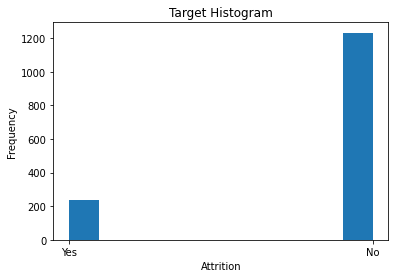

Yes Percentage: 16.122448979591837
No Percentage: 83.87755102040816


In [156]:
plt.hist(data.Attrition)
plt.title('Target Histogram')
plt.ylabel('Frequency')
plt.xlabel('Attrition')
plt.show()

yes = len(data[data['Attrition'] == 'Yes'])/len(data)
print(f'Yes Percentage: {yes*100}')

no = len(data[data['Attrition'] == 'No'])/len(data)
print(f'No Percentage: {no*100}')

- There are 1470 observations and 35 features. 
- None of the features has missing data.
- The data types are: integer and object.
- The target feature is imbalanced: 16% of "Yes" and 84% of "No".

In [152]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [153]:
data = pd.read_csv('dataset.csv')

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Gender Analysis

- What is the age distribution between females and males? Are there significant discrepancies?
- What is the average salary by gender? 
- What are the number of employees by gender in each department?
- What is the average job satisfaction by attrition class? There are significant differences?

             mean       std
              Age       Age
Gender                     
Female  37.329932  9.266083
Male    36.653061  9.042329


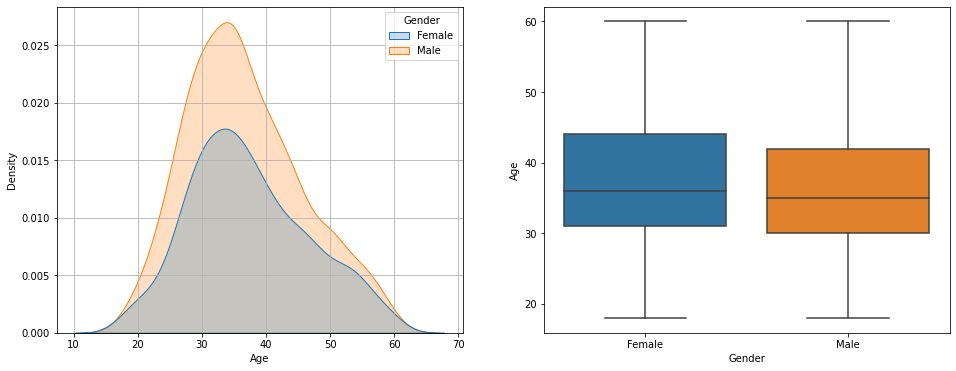

In [157]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.kdeplot(data['Age'], fill = True, hue=data['Gender'])
plt.grid()
plt.subplot(1,2,2)
sns.boxplot(data['Gender'], data['Age'])

print(data.pivot_table(index='Gender', values='Age', aggfunc=[np.mean, np.std]))

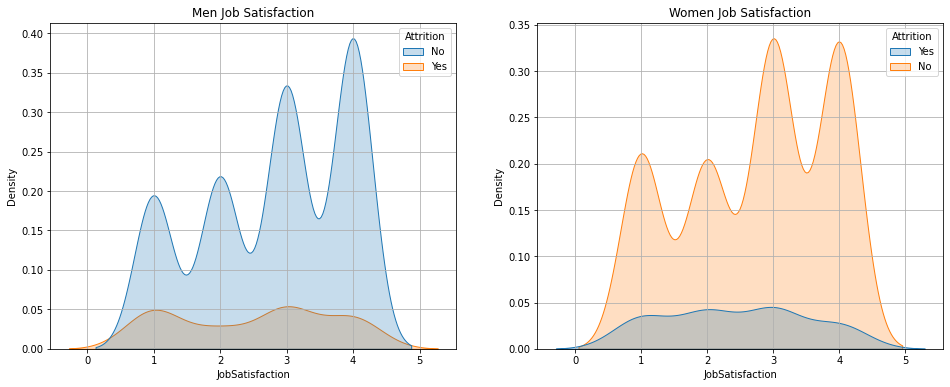

                            mean             std
                 JobSatisfaction JobSatisfaction
Gender Attrition                                
Female No               2.728543        1.098255
       Yes              2.425287        1.052485
Male   No               2.812842        1.089283
       Yes              2.493333        1.157100


In [158]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.kdeplot(data['JobSatisfaction'][data['Gender']=='Male'], hue=data['Attrition'][data['Gender']=='Male'], fill=True)
plt.grid()
plt.title('Men Job Satisfaction')
plt.subplot(1,2,2)
sns.kdeplot(data['JobSatisfaction'][data['Gender']=='Female'], hue=data['Attrition'][data['Gender']=='Female'], fill=True)
plt.grid()
plt.title('Women Job Satisfaction')
plt.show()

print(data.pivot_table(index=['Gender', 'Attrition'], values='JobSatisfaction', aggfunc=[np.mean, np.std]))

In [159]:
print('Men: ')
print(data[data['Gender']=='Male'].pivot_table(index='Department', values='Gender', aggfunc=len))

print('\nWomen: ')
print(data[data['Gender']=='Female'].pivot_table(index='Department', values='Gender', aggfunc=len))

Men: 
                        Gender
Department                    
Human Resources             43
Research & Development     582
Sales                      257

Women: 
                        Gender
Department                    
Human Resources             20
Research & Development     379
Sales                      189


<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

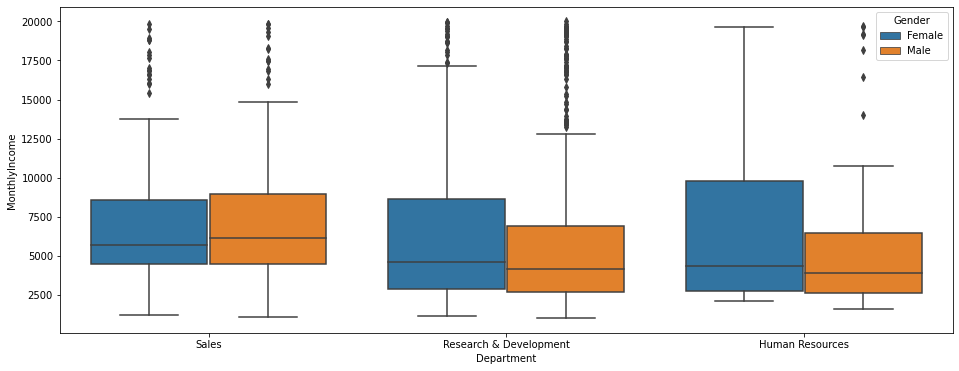

In [160]:
plt.figure(figsize=(16,6))

sns.boxplot(data['Department'], data['MonthlyIncome'], hue=data['Gender'])


<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

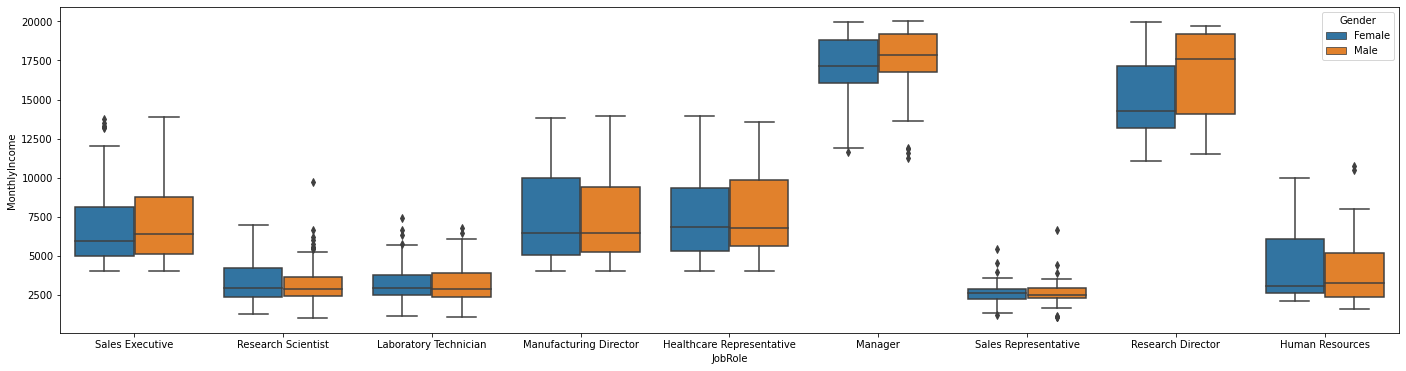

In [161]:
plt.figure(figsize=(24,6))

sns.boxplot(data['JobRole'], data['MonthlyIncome'], hue=data['Gender'])


In [ ]:
plt.figure(figsize=(16,6))

sns.boxplot(data['Gender'], data['MonthlyIncome'])

In [ ]:
men_women = data.pivot_table(index=['Gender', 'JobRole'], values= 'MonthlyIncome', aggfunc=[np.mean, np.std]).reset_index()

men_women

In [ ]:
plt.figure(figsize=(24,6))
sns.boxplot(data['YearsAtCompany'],data['MonthlyIncome'], hue=data['Gender'])
plt.title('Montlhy Income by Each Gender x Years at Company')

In [ ]:
relative_dif = 100*(men_women[men_women['Gender']=='Female']['mean'].values - men_women[men_women['Gender']=='Male']['mean'].values)/ men_women[men_women['Gender']=='Male']['mean'].values
plt.figure(figsize=(18,8))
plt.scatter(men_women[men_women['Gender']=='Male']['JobRole'], relative_dif, color='red', label='Women')
plt.plot(np.arange(0,9,1),np.arange(0,9,1)*0, '-.')
plt.grid()
plt.title('Average Monthly Income Relative Difference by Job Role (Reference: Men)')
plt.legend()
plt.ylabel('% Average Income Difference for Women ')

# Statistical Hypothesis Test

Let's execute a statistical hypothesis test to check if there is siginificant difference between the average monthly income for each gender.

In [ ]:
from visualization import check_normal


plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
men_income = data[data['Gender']=='Male']['MonthlyIncome'].values
check_normal(men_income)

plt.subplot(1,2,2)
women_income = data[data['Gender']=='Female']['MonthlyIncome'].values
check_normal(women_income)

The monthly income distributions aren't normal. So we will have to use the Mann-Whitney Hypothesis Test.  

- $H_0$ (Null Hypothesis): There aren't difference between the means (income) of each gender.

- $H_1$ (Alternative Hypothesis): There are difference between the means (income) of each gender.

In [ ]:
import scipy.stats as stats
u, pVal = stats.mannwhitneyu(men_income,women_income)
print(pVal)

As we can see from the plots above, apparently, there aren't significant differences between the incomes of each gender. The cases that have more contrast are: Human Resources (Women Income ~10% Higher) and Research Director (Women Income ~10% Lower). When we analize the p-value from the Mann-Whitney Hypothesis Test, we can see that it's very close to the threshold 0.05 (~ 0.045), indicating a more positive outcome for the $H_1$ hypothesis (but not so strong). These differences can be explained by the influence of other features such as: educational levels, years of experience of each gender and outliers. So, I'm concluding that there is no significant difference between the average income of women and men at this company.

## Conclusions so far....

- There is no significant difference between the average monthly income of men and women in this company;
- The age distribution of each gender is very similar;
- As expected, employees with more years at company and higher educational levels have a bigger income;
- The job satisfaction is higher for employees with no attrition and the distributions of both genders are similar. 

# Let's explore a little more:

- What is the level of attrition by overtime status?
- What is the impact of income on attrition?
- What is the satisfaction by income?
- What is the percentage of attrition by job role?
- What is the percentage of attrition by educational level?
- What is the relationship satisfaction in each department?


In [ ]:
print('Attrition: ')
print(data[data['Attrition']=='Yes'].pivot_table(index=['OverTime'], values='Attrition', aggfunc=len))


Attrition: 
          Attrition
OverTime           
No              110
Yes             127


<AxesSubplot:xlabel='JobSatisfaction', ylabel='MonthlyIncome'>

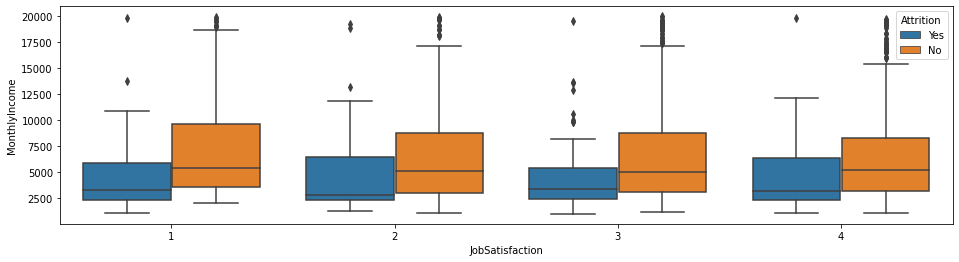

In [ ]:
plt.figure(figsize=(16,4))
sns.boxplot(data['JobSatisfaction'], data['MonthlyIncome'], hue=data['Attrition'])

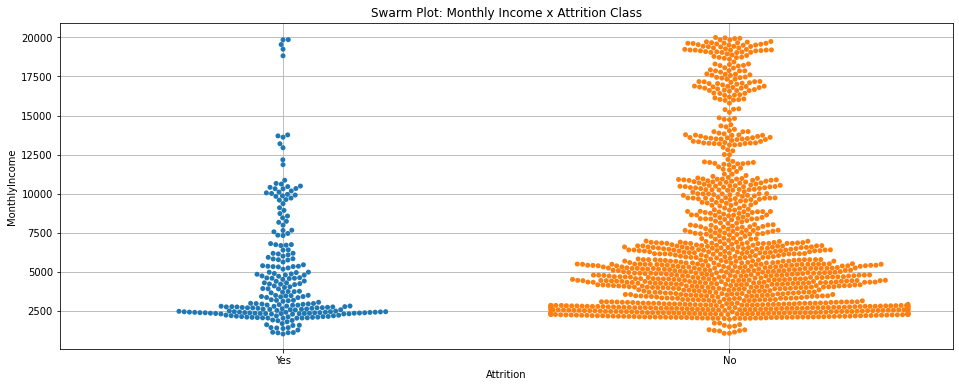

In [ ]:
plt.figure(figsize=(16,6))
sns.swarmplot(data['Attrition'], data['MonthlyIncome'])
plt.grid()
plt.title('Swarm Plot: Monthly Income x Attrition Class')
plt.show()

In [ ]:
data.pivot_table(index='Attrition', values='PercentSalaryHike', aggfunc=[np.mean, np.median, np.std])

,mean,median,std
,PercentSalaryHike,PercentSalaryHike,PercentSalaryHike
Attrition,,,
No,15.231144,14,3.639511
Yes,15.097046,14,3.770294


In [ ]:
data.pivot_table(index='Attrition', values='MonthlyIncome', aggfunc=[np.mean, np.median, np.std])

,mean,median,std
,MonthlyIncome,MonthlyIncome,MonthlyIncome
Attrition,,,
No,6832.739659,5204,4818.208001
Yes,4787.092827,3202,3640.210367


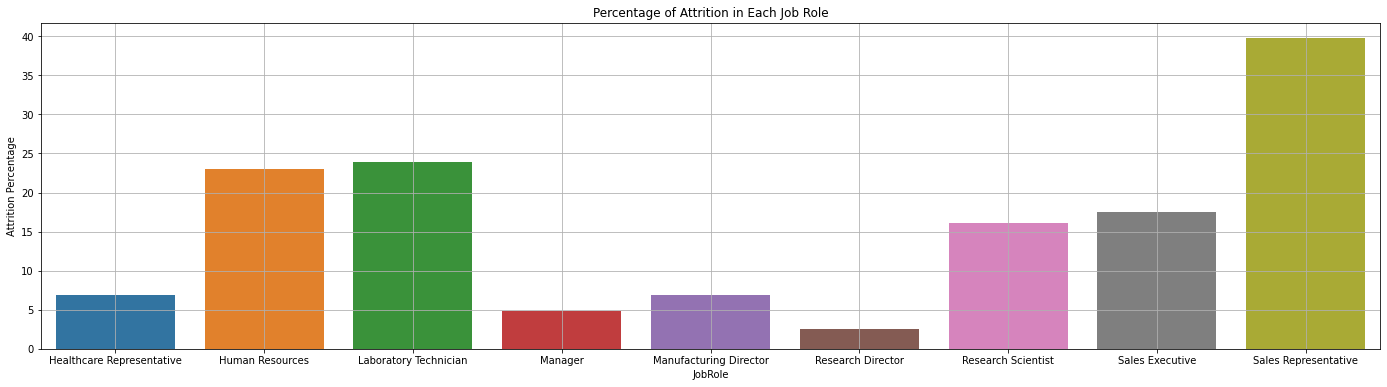

In [ ]:
plt.figure(figsize=(24,6))

jobs_total = data.pivot_table(index='JobRole', values='Attrition', aggfunc=len).reset_index()
jobs_yes = data[data['Attrition']=='Yes'].pivot_table(index='JobRole', values='Attrition', aggfunc=len).reset_index()
percentage = 100*(jobs_yes.Attrition)/jobs_total.Attrition

sns.barplot(jobs_yes.JobRole, percentage)
plt.grid()
plt.ylabel('Attrition Percentage')
plt.title('Percentage of Attrition in Each Job Role')
plt.show()


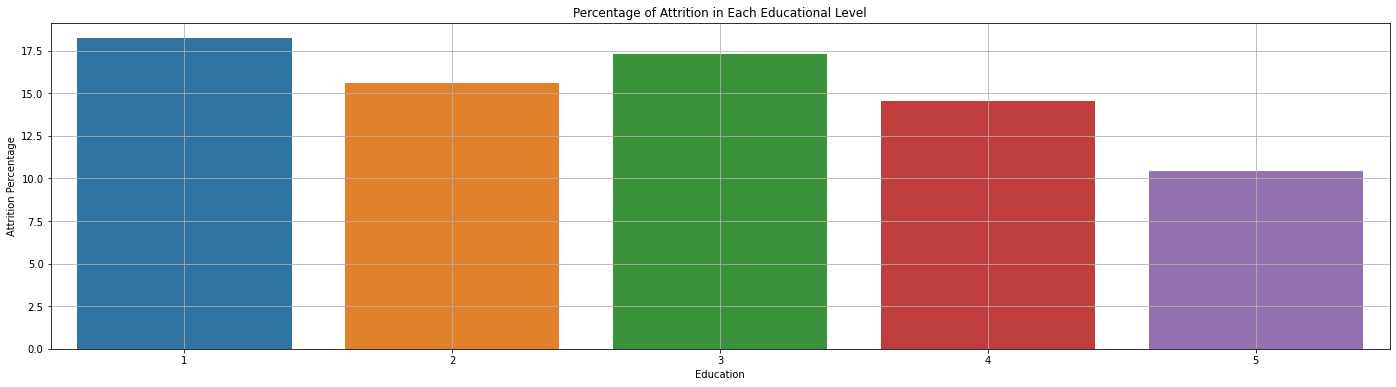

In [ ]:
plt.figure(figsize=(24,6))

ed_total = data.pivot_table(index='Education', values='Attrition', aggfunc=len).reset_index()
ed_yes = data[data['Attrition']=='Yes'].pivot_table(index='Education', values='Attrition', aggfunc=len).reset_index()
percentage = 100*(ed_yes.Attrition)/ed_total.Attrition

sns.barplot(ed_yes.Education, percentage)
plt.grid()
plt.ylabel('Attrition Percentage')
plt.title('Percentage of Attrition in Each Educational Level')
plt.show()


In [167]:
data.pivot_table(index=['Department'], columns='Attrition', values='RelationshipSatisfaction', aggfunc=[np.mean, np.std])

mean                 std          
Attrition                     No       Yes        No       Yes
Department                                                    
Human Resources         2.843137  3.083333  1.027084  0.900337
Research & Development  2.739130  2.518797  1.052234  1.165160
Sales                   2.706215  2.652174  1.123338  1.083693

In [ ]:
data['Attrition'] = data['Attrition'].map({'No':0, 'Yes':1})

In [ ]:
safe_data = data.copy()

numeric= ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','TrainingTimesLastYear']

target = ['Attrition']

object = ['BusinessTravel', 'Department', 'Education', 'EducationField','EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'WorkLifeBalance']

data_object = data[object].astype("category")

data_numeric = data[numeric].astype("float64")

frames = [data_numeric,pd.get_dummies(data_object)]

rh_data = pd.concat(frames,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(rh_data, data[target], test_size=0.33, stratify=data[target])



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numeric_data = scaler.fit_transform(x_train[numeric])

numeric_data_test = scaler.transform(x_test[numeric])

x_train[numeric] = numeric_data

x_test[numeric] = numeric_data_test

x_train.head()

In [ ]:
x_test.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

rf_params = {
    'n_estimators': 1000,
    'max_features': 'auto',
    'max_depth': 4,
    'verbose': 0,
    'class_weight': 'balanced'
}


rf = RandomForestClassifier(**rf_params)

scores = cross_val_score(rf, x_train.values,y_train.values.reshape(-1), cv=skf, scoring='f1_macro')

print(scores)


In [ ]:
rf.fit(x_train,y_train.values.reshape(-1))

y_pred = rf.predict(x_test)

print(classification_report(y_pred,y_test.values.reshape(-1)))

In [ ]:
import dalex as dx

exp = dx.Explainer(rf, rh_data, data[target].values.reshape(-1))

In [ ]:
mp = exp.model_performance(model_type = 'classification')
mp.result

In [ ]:
mp.plot(geom="roc")